In [1]:
# dict 와 TypedDict
from typing import Dict, TypedDict

sample_dict = {
    "name": "이름",
    "age" : 30,
    "job" : "인간"
}

sample_dict["age"] = 35


class Person(TypedDict):
    name : str
    age : int
    job : str

typed_dict : Person = {"name" : "이름", "age" : 25, "job" : "인간"}

In [2]:
from typing import Annotated

# 힌트/주석 역할
name : Annotated[str, "이름"]
age : Annotated[int, "나이 (1~150)"]

In [3]:
from typing import Annotated, TypedDict
from langgraph.graph import add_messages

class MyData(TypedDict):
    messages: Annotated[list, add_messages]

In [4]:
from langchain_core.messages import AIMessage, HumanMessage
from langgraph.graph import add_messages

msg1 = [HumanMessage(content="반갑다", id="1")]
msg2 = [AIMessage(content="반갑습니다~", id="2")]

# 동일한 아이디면 덮어씌우고 다른 아이디면 이어붙인다
result1 = add_messages(msg1, msg2)
print(result1)

[HumanMessage(content='반갑다', additional_kwargs={}, response_metadata={}, id='1'), AIMessage(content='반갑습니다~', additional_kwargs={}, response_metadata={}, id='2')]


In [2]:
from dotenv import load_dotenv
import os

load_dotenv()

True

In [5]:
### 1. 상태정의
from typing import Annotated, TypedDict
from langgraph.graph import StateGraph, START, END
from langgraph.graph.message import add_messages

class State(TypedDict):
    messages: Annotated[list, add_messages]

In [7]:
### 2. 노드 정의
from langchain_openai import ChatOpenAI

llm = ChatOpenAI(model="gpt-5-nano", temperature=0)

def chatbot(state: State):
    return {"messages": [llm.invoke(state["messages"])]}

In [8]:
### 3. 노드 추가
graph_builder = StateGraph(State)

graph_builder.add_node("chatbot", chatbot)

In [ ]:
### 4. 엣지로 연결
graph_builder.add_edge(START, "chatbot")
graph_builder.add_edge("chatbot", END)

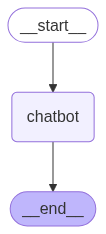

In [ ]:
### 5. 그래프 컴파일
graph = graph_builder.compile()

# 컴파일 후 시각화로 확인
from IPython.display import display, Image
display(Image(graph.get_graph().draw_mermaid_png()))

In [13]:
### 6. 그래프 실행
question = "서울의 유명한 맛집 TOP 10 추천해줘"

for event in graph.stream({"messages": [("user", question)]}):
    for value in event.values():
        print("Assistant:", value["messages"][-1].content)

Assistant: 멋진 요청이에요! 아래 목록은 서울에서 "유명하고 다양한 맛을 체험할 수 있는 맛집" 위주로 10곳을 뽑아본 거예요. 분위기와 예산이 다양하니, 취향에 맞춰 골라 보세요. 방문 전에 영업시간이나 예약 여부를 꼭 확인하시길 권합니다.

1) Tosokchon Samgyetang (토속촌 삼계탕)
- 대표 메뉴: 삼계탕
- 분위기/포인트: 한국 전통 가정식 느낌의 진한 보양식. 멀리서도 찾기 쉬운 명소.
- 위치감: 경복궁 인근에 위치해 있어 관광객과 현지인 모두 많이 찾음.

2) Myeongdong Kyoja (명동교자)
- 대표 메뉴: 칼국수, 만두
- 분위기/포인트: 간단하고 든든한 한국식 면 요리의 클래식. 가성비 좋음.
- 위치감: 명동의 핵심 맛집 중 하나로 접근성 좋아요.

3) Bukchon Son Mandu (북촌손만두)
- 대표 메뉴: 손만두, 모듬만두
- 분위기/포인트: 북촌 한옥마을 분위기 속에서 즐기는 만두 맛집.
- 위치감: Bukchon 지역의 유명 핫스팟과 근접.

4) Sanchon (산촌)
- 대표 메뉴: 템플푸드 코스, 채식 코스
- 분위기/포인트: 인사동의 조용하고 독특한 채식 레스토랑. 자연스러운 한식 풍미를 느낄 수 있음.
- 위치감: 인사동 근처.

5) Gaon (가온)
- 대표 메뉴: 한식 파인 다이닝 코스
- 분위기/포인트: 정갈한 상차림과 섬세한 코스 요리로 한국의 현대적 미식경험을 제시하는 곳.
- 위치/타깃: 고급 한식 다이닝으로 데이트나 특별한 자리 추천.

6) Mingles (밍글스)
- 대표 메뉴: 현대 한식 코스
- 분위기/포인트: 창의적이고 다채로운 맛의 코스 요리로 국내외에서도 유명한 파인 다이닝.
- 위치/타깃: 강남권 인근이나 도심에서 접근성 좋은 고급 레스토랑.

7) Jungsik Seoul (정식)
- 대표 메뉴: 현대 한식 코스
- 분위기/포인트: 미식가들 사이에서 오랫동안 사랑받아온 현대적 한식 레스토랑.
- 위치/타깃: 분위기 있는 저녁 식사나 특별한 자리 추천.


In [ ]:
# 랭그래프 (State -> Node -> StateGraph -> Edge -> compile -> run)
from typing import Annotated, TypedDict
from langgraph.graph import StateGraph, START, END
from langgraph.graph.message import add_messages
from langchain_openai import ChatOpenAI
from IPython.display import display, Image

### 1. State 정의 ###
class State(TypedDict):
    messages: Annotated[list, add_messages]

### 2. Node 정의 ###
llm = ChatOpenAI(model="gpt-5-nano", temperature=0)

def chatbot(state : State):
    return {"messages": [llm.invoke(state["messages"])]}

### 3. StateGraph객체화 / 노드 추가 ###
graph_builder = StateGraph(State)
graph_builder.add_node("chatbot", chatbot)

### 4. Edge 로 노드 연결 ###
graph_builder.add_edge(START, "chatbot")
graph_builder.add_edge("chatbot", END)

### 5. 컴파일 ###
graph = graph_builder.compile()

# display(Image(graph.get_graph().draw_mermaid_png()))    # 시각화

### 6. 그래프 실행 ###
question = "서울 종로의 유명한 맛집 TOP 3 추천해줘"

for event in graph.stream({"messages": [("user", question)]}):
    for value in event.values():
        print(value["messages"][-1].content)

좋아요! 서울 종로에서 유명하고 만족도가 높은 맛집 3곳을 골랐어요.

- Tosokchon Samgyetang (토속촌삼계탕)
  - 대표 메뉴: 삼계탕(인삼과 닭고기 국물의 영양 가득한 보양식)
  - 위치/느낌: 경복궁 근처, 한식의 클래식 같은 분위기
  - 왜 유명한가: 오랜 전통의 방문객 사랑을 받는 삼계탕의 대표주자 중 하나
  - 팁: 점심시간대는 줄이 길 수 있으니 이른 점심이나 조금 늦은 시간대에 가면 기다림이 덜합니다.

- Bukchon Son Mandu (북촌손만두)
  - 대표 메뉴: 손만두, 만두전골 등 만두 요리
  - 위치/느낌: 북촌 한옥마을 인근, 캐주얼하고 편안한 분위기
  - 왜 유명한가: 손으로 빚는 만두의 맛과 바삭한 군만두가 유명
  - 팁: 가볍게 한 끼로 좋고, 만두류는 양이 작게 나오는 편이므로 남길 경우를 대비해 간단히 시켜도 좋습니다.

- Sanchon (산촌)
  - 대표 메뉴: 채식 중심의 템플푸드 코스, 계절 반찬과 밥
  - 위치/느낌: 인사동 지역(종로구)으로 차분하고 독특한 분위기
  - 왜 유명한가: 전통 사찰 음식으로 유명한 곳으로, 독특한 채식 코스 요리를 체험할 수 있습니다
  - 팁: 코스 요리 형태라 가격대가 다소 높은 편이니 예산을 미리 확인하면 좋습니다. 예약이 도움이 됩니다.

원하시면 예산대(1인당 얼마대), 선호하는 맛 타입(한국식, 모던한 분위기, 채식 위주 등), 가능 시간대에 맞춰 추가 후보도 더 드리고 상세한 위치·영업시간 정보도 정리해 드릴게요. 어떤 분위기나 예산으로 원하시나요?
